In [ ]:
## Speech and Natural Language Processing (SNLP)

## Lab01 (21/07/24)
## Tokens, text cleaning and frequency based vectorisation methods for text classification

In [2]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [7]:
df = df.iloc[:, 0:2]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

def Stopwords_Removed(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Stopwords_Removed'] = df['message'].apply(Stopwords_Removed)
df.head()

,label,message,Stopwords_Removed
0,ham,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah n't think goes usf , lives around though"


In [18]:
import re
import string

def Punctuation_Removed(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).split()

df['Punctuation_Removed'] = df['Stopwords_Removed'].apply(Punctuation_Removed)
df.head()

,label,message,Stopwords_Removed,Punctuation_Removed
0,ham,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah n't think goes usf , lives around though","[Nah, nt, think, goes, usf, lives, around, tho..."


In [ ]:
## EDA

# - Find the 10 most frequent words for each class (remove stopwords first)
# - Find the 10 most frequent bi-rgams each class  (remove stopwords first)
# - Find the 10 most frequent tri-rgams each class  (remove stopwords first)
# - Create wordcloud each class (remove stopwords first)

In [19]:
## Find the 10 most frequent words for each class
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def Plot_Most_Common_Words(df, category, num_words):
    words = df[df['label'] == category]['Stopwords_Removed'].tolist()
    words = [word for sublist in words for word in sublist]
    return Counter(words).most_common(num_words)

print('The top 10 most common words for Spam Messages:')
print(Plot_Most_Common_Words(df, 'spam', 10))

The top 10 most common words for Spam Messages:
[(' ', 14911), ('e', 5805), ('t', 3573), ('a', 3451), ('o', 3197), ('0', 3088), ('r', 2982), ('l', 2925), ('n', 2897), ('i', 2862)]


<Axes: title={'center': 'Top 10 most common words in Spam Messages'}>

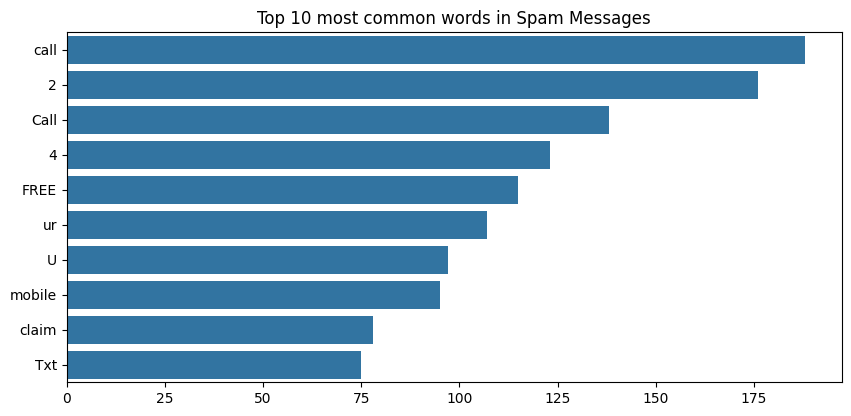

In [20]:
# The 10 most common words in SPAM
def Plot_Most_Common_Words(df, category, num_words):
    words = df[df['label'] == category]['Punctuation_Removed'].tolist()
    words = [word for sublist in words for word in sublist]
    return Counter(words).most_common(num_words)

common_words = Plot_Most_Common_Words(df, 'spam', 10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Top 10 most common words in Spam Messages')
sns.barplot(y=words, x=counts)

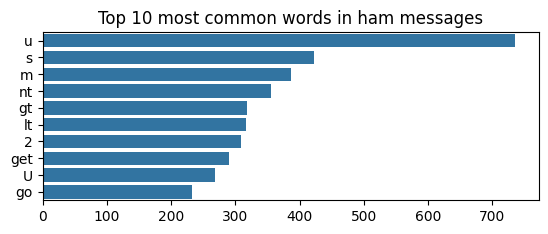

In [21]:
# plot the most common words in HAM
common_words = Plot_Most_Common_Words(df, 'ham', 10)
words, counts = zip(*common_words)

plt.subplot(2, 1, 2)
plt.title('Top 10 most common words in ham messages')
sns.barplot(y=words, x=counts)
plt.show()

<Axes: title={'center': 'Top 10 Most Common Bigrams in Spam Messages'}>

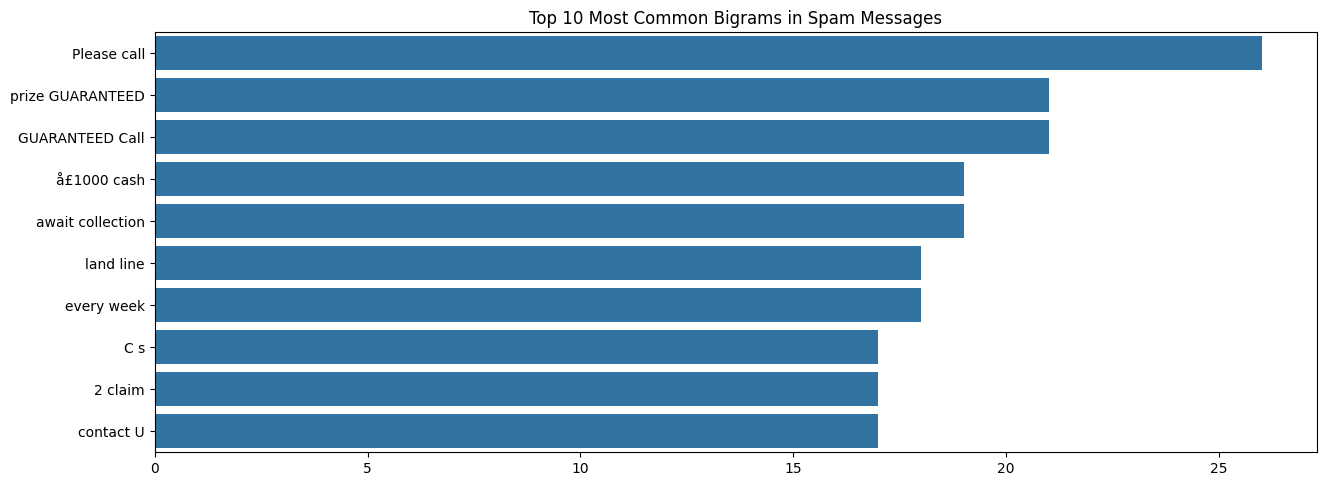

In [30]:
## Find the 10 most frequent bi-rgams each class
# The 10 Most Frequent Bigrams in SPAM Messages

from nltk import bigrams
from nltk.util import ngrams

def Plot_Most_Common_Bigrams(df, category, num_ngrams, n):
    words = df[df['label'] == category]['Punctuation_Removed'].tolist()
    words = [word for sublist in words for word in sublist]
    ngrams_list = list(ngrams(words, n))
    return Counter(ngrams_list).most_common(num_ngrams)

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
common_ngrams = Plot_Most_Common_Bigrams(df, 'spam', 10, 2)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1]) for word in words]
plt.title('Top 10 Most Common Bigrams in Spam Messages')
sns.barplot(y=words, x=counts)

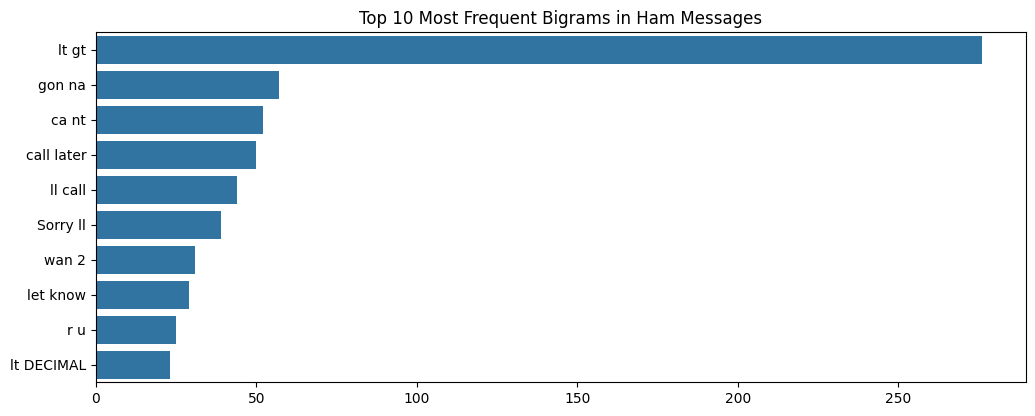

In [29]:
## Find the 10 most frequent bi-rgams each class
# The 10 most Frequent Bigrams in HAM Messages

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 2)
common_ngrams = Plot_Most_Common_Bigrams(df, 'ham', 10, 2)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1]) for word in words]
plt.title('Top 10 Most Frequent Bigrams in Ham Messages')
sns.barplot(y=words, x=counts)
plt.show()

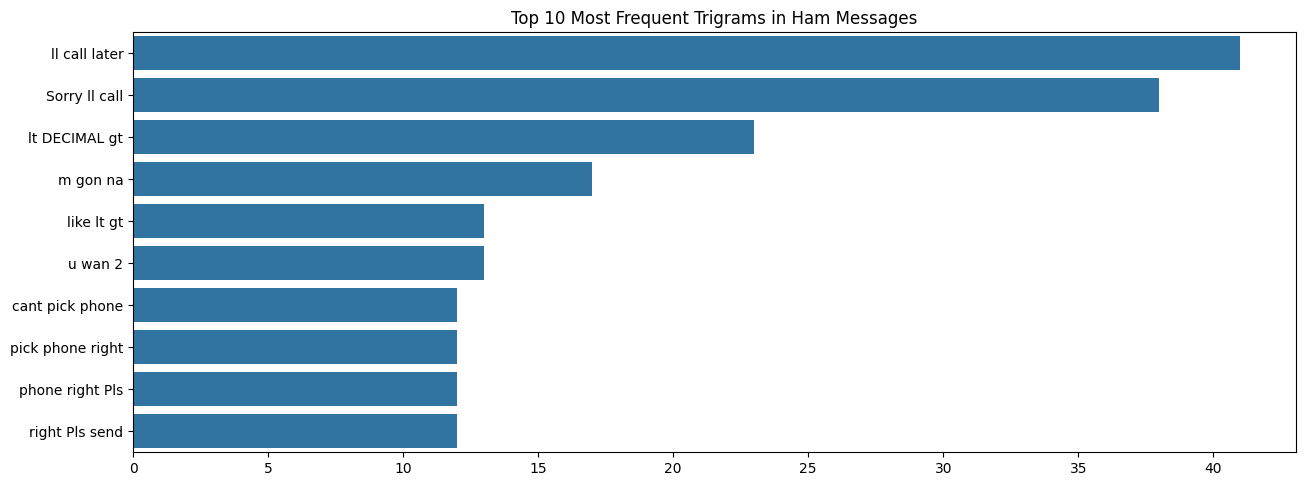

In [28]:
## Find the 10 most frequent tri-rgams each class
# The 10 Most Frequent Trigrams in SPAM Messages

def Plot_Most_Common_Trigrams(df, category, num_ngrams, n):
    words = df[df['label'] == category]['Punctuation_Removed'].tolist()
    words = [word for sublist in words for word in sublist]
    ngrams_list = list(ngrams(words, n))
    return Counter(ngrams_list).most_common(num_ngrams)

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 2)
common_ngrams = Plot_Most_Common_Trigrams(df, 'ham', 10, 3)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1] + " " + word[2]) for word in words]
plt.title('Top 10 Most Frequent Trigrams in Ham Messages')
sns.barplot(y=words, x=counts)
plt.show()

<Axes: title={'center': 'Top 10 Most Frequent Trigrams in Spam Messages'}>

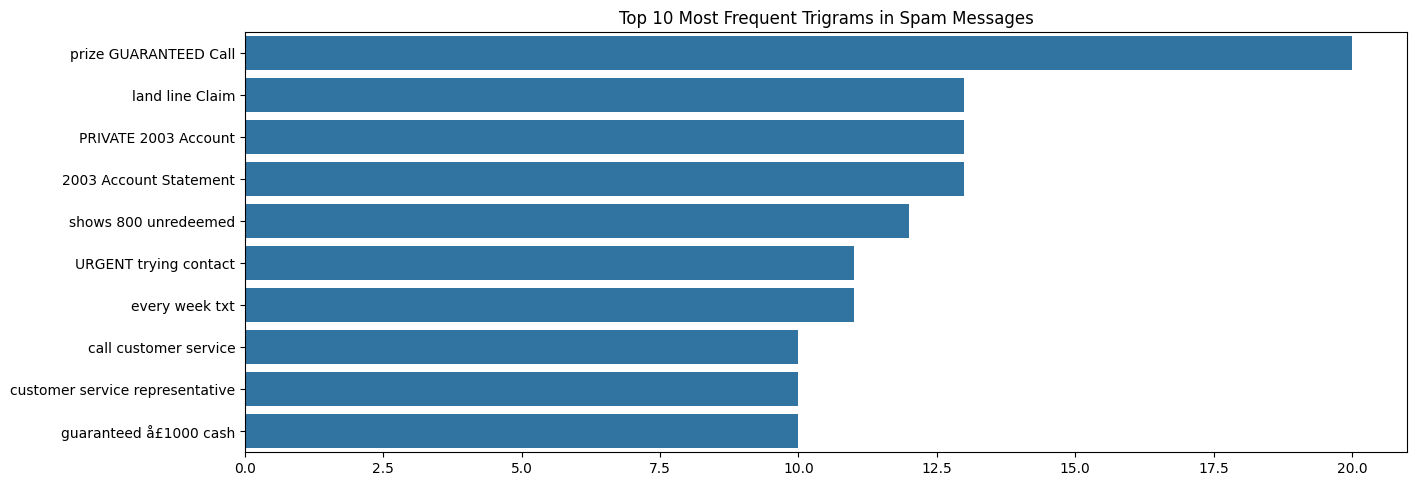

In [27]:
# The 10 Most Frequent Trigrams in SPAM Messages

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
common_ngrams = Plot_Most_Common_Trigrams(df, 'spam', 10, 3)
words, counts = zip(*common_ngrams)
words = [str(word[0]+ " " + word[1] + " " + word[2]) for word in words]
plt.title('Top 10 Most Frequent Trigrams in Spam Messages')
sns.barplot(y=words, x=counts)

In [31]:
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,message,Stopwords_Removed,Punctuation_Removed
0,0,"Go until jurong point, crazy.. Available only ...","Go jurong point , crazy .. Available bugis n g...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar ... Joking wif u oni ...,"[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say early hor ... U c already say ...,"[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah n't think goes usf , lives around though","[Nah, nt, think, goes, usf, lives, around, tho..."


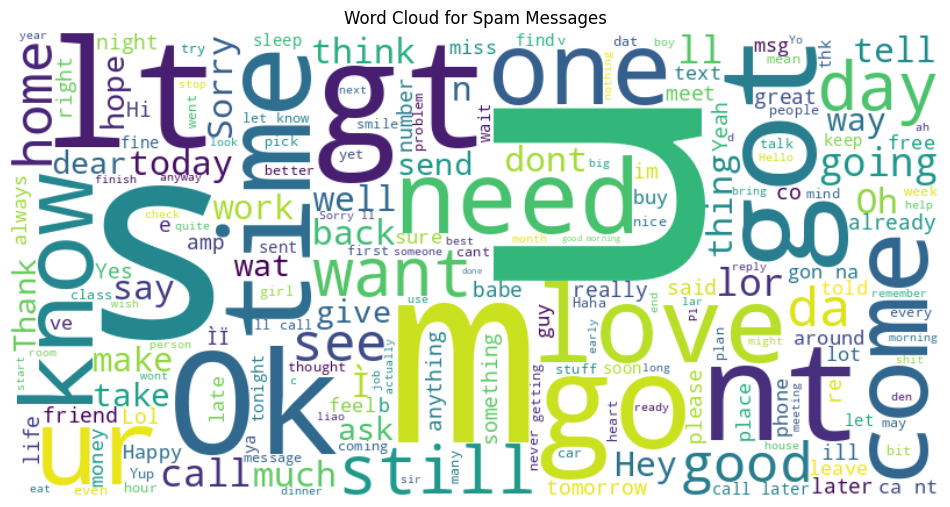

In [35]:
# Create wordcloud each class

df1=df[df["label"]==0]
df2=df[df["label"]==1]

list1 = [item for sublist in df1['Punctuation_Removed'] for item in sublist]
list2 = [item for sublist in df2['Punctuation_Removed'] for item in sublist]

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(filtered_tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(list1, "Word Cloud for Spam Messages")

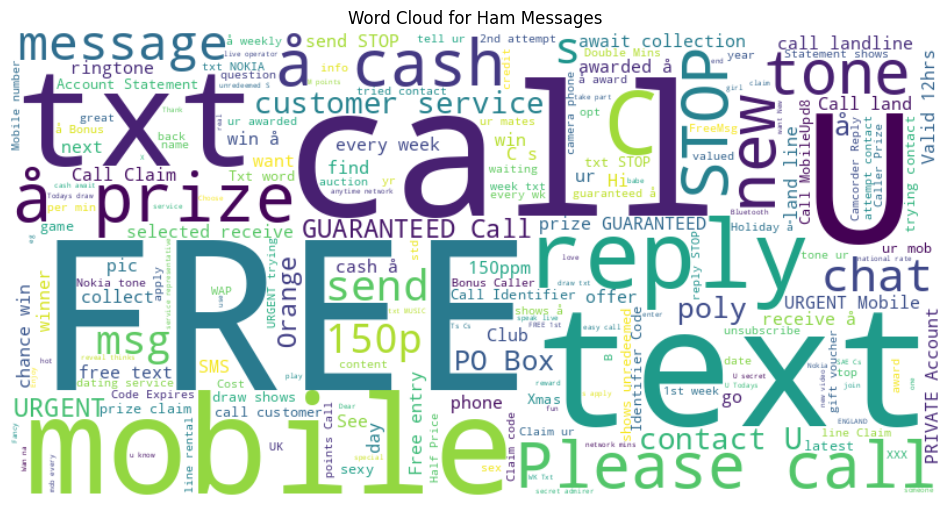

In [36]:
generate_wordcloud(list2, "Word Cloud for Ham Messages")

In [37]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
X = CV.fit_transform(df['message'])
Vector = X.toarray()
Feature_Names = CV.get_feature_names_out()

print("Feature Names:", Feature_Names)
print("Vectors:")
print(Vector)

Feature Names: ['00' '000' '000pes' ... 'ûïharry' 'ûò' 'ûówell']
Vectors:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , f1_score
X_train, X_test, y_train, y_test = train_test_split(Vector, df['label'], test_size=0.2, random_state=42)

In [ ]:
## Naive Bayes

In [57]:
from sklearn.naive_bayes import MultinomialNB
SPAM_Detection_Model = MultinomialNB().fit(X_train, y_train)

Y_Pred = SPAM_Detection_Model.predict(X_test)

Accuracy = accuracy_score(y_test, Y_Pred)
F1_Score = f1_score(y_test, Y_Pred)

print(f"Accuracy: {Accuracy:.3f}")

Accuracy: 0.978


In [58]:
print(f"F1 Score: {F1_Score:.3f}")

F1 Score: 0.921


In [48]:
# TF-IDF Model
from sklearn.feature_extraction.text import TfidfVectorizer

CV1 = TfidfVectorizer()
X1 = CV1.fit_transform(df['message'])
Vector1 = X1.toarray()
Feature_Names1 = CV1.get_feature_names_out()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Vector1, df['label'], test_size=0.2, random_state=42)

SPAM_Detection_Model1 = MultinomialNB().fit(X_train, y_train)

Y_Pred1 = SPAM_Detection_Model1.predict(X_test)

Accuracy1 = accuracy_score(y_test, Y_Pred1)
F1_Score1 = f1_score(y_test, Y_Pred1)

print(f"Accuracy: {Accuracy1:.3f}")
print(f"F1 Score: {F1_Score1:.3f}")

Accuracy: 0.962
F1 Score: 0.837


In [46]:
## TF-IDF Model with Text - Preprocessing

def Text_Preprocessing(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)   # Remove URLs
    text = re.sub(r'<.*?>', '', text)     # Remove HTML tags
    text = re.sub(r'\d+', '', text)     ## remove numbers

    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

df['TF-IDF_TP'] = df['message'].apply(Text_Preprocessing)

In [52]:
Vector2 = TfidfVectorizer().fit_transform(df['TF-IDF_TP']).toarray()
Feature_Names2 = CV1.get_feature_names_out()

X_train, X_test, y_train, y_test = train_test_split(Vector2, df['label'], test_size=0.2, random_state=42)

SPAM_Detection_Model2 = MultinomialNB().fit(X_train, y_train)

Y_Pred2 = SPAM_Detection_Model2.predict(X_test)
Accuracy2 = accuracy_score(y_test, Y_Pred2)
F1_Score2 = f1_score(y_test, Y_Pred2)

print(f"Accuracy: {Accuracy2:.3f}")
print(f"F1 Score: {F1_Score2:.3f}")

Accuracy: 0.965
F1 Score: 0.851


In [ ]:
## Naive Bayes
# Accuracy: 0.978
# F1 Score: 0.921

## Tf-IDF Model
# Accuracy: 0.962
# F1 Score: 0.837

## TF-IDF Model with Text - Preprocessing
# Accuracy: 0.965
# F1 Score: 0.851